<a href="https://colab.research.google.com/github/SJhawar1010/Deep-Learning/blob/main/2348554_DL_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input, concatenate

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv("/content/drive/MyDrive/DL Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID : Customer ID

gender : Whether the customer is a male or a female

SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

Partner : Whether the customer has a partner or not (Yes, No)

Dependents : Whether the customer has dependents or not (Yes, No)

tenure : Number of months the customer has stayed with the company

PhoneService : Whether the customer has a phone service or not (Yes, No)

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract : The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged to the customer monthly

TotalCharges : The total amount charged to the customer

Churn : Whether the customer churned or not (Yes or No)

In [58]:
df.shape

(7043, 21)

In [59]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [60]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [61]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [63]:
X = pd.get_dummies(X, drop_first=True)

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [66]:
def build_baseline_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [67]:
def build_dropout_model(input_dim, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [68]:
def build_layerwise_dropout_model(input_dim, dropout_rates=[0.2, 0.3, 0.4]):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    for dropout_rate in dropout_rates:
        model.add(Dropout(dropout_rate))
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [69]:
def build_monte_carlo_dropout_model(input_dim, dropout_rate=0.5):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(dropout_rate)(x, training=True)
    x = Dense(32, activation='relu')(x)
    x = Dropout(dropout_rate)(x, training=True)
    outputs = Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [70]:
input_dim = X_train.shape[1]

In [71]:
baseline_model = build_baseline_model(input_dim)
baseline_history = baseline_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0)

In [72]:
dropout_model = build_dropout_model(input_dim)
dropout_history = dropout_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0)

In [73]:
layerwise_dropout_model = build_layerwise_dropout_model(input_dim)
layerwise_dropout_history = layerwise_dropout_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0)

In [53]:
monte_carlo_dropout_model = build_monte_carlo_dropout_model(input_dim)
monte_carlo_dropout_history = monte_carlo_dropout_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0)

In [74]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y, y_pred_binary)
    f1 = f1_score(y, y_pred_binary)
    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    return accuracy, f1, roc_auc

In [75]:
baseline_evaluation = evaluate_model(baseline_model, X_val, y_val)
dropout_evaluation = evaluate_model(dropout_model, X_val, y_val)
layerwise_dropout_evaluation = evaluate_model(layerwise_dropout_model, X_val, y_val)
monte_carlo_dropout_evaluation = evaluate_model(monte_carlo_dropout_model, X_val, y_val)

45/45 [==============================] - 0s 5ms/step


In [76]:
def plot_training_curves(history, title):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

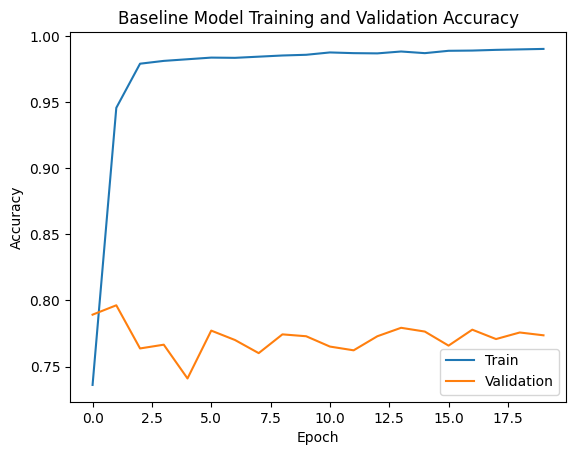

In [77]:
plot_training_curves(baseline_history, 'Baseline Model Training and Validation Accuracy')

In [78]:
print("Baseline Model Evaluation:")
print("Accuracy:", baseline_evaluation[0])
print("F1 Score:", baseline_evaluation[1])
print("ROC AUC:", baseline_evaluation[2])

Baseline Model Evaluation:
Accuracy: 0.7735982966643009
F1 Score: 0.6206896551724138
ROC AUC: 0.7993636589481093


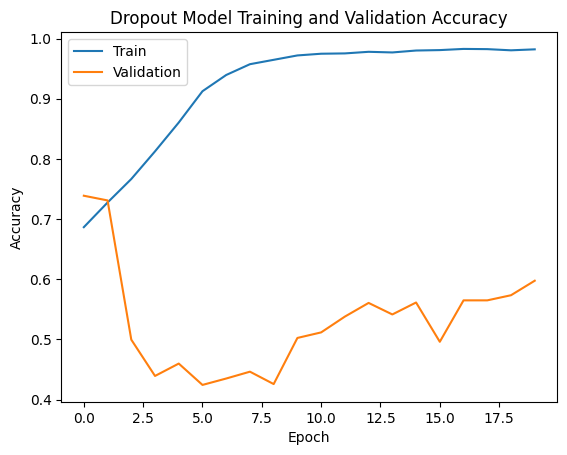

In [79]:
plot_training_curves(dropout_history, 'Dropout Model Training and Validation Accuracy')

In [85]:
print("Dropout Model Evaluation:")
print("Accuracy:", dropout_evaluation[0])
print("F1 Score:", dropout_evaluation[1])
print("ROC AUC:", dropout_evaluation[2])

Dropout Model Evaluation:
Accuracy: 0.5975869410929737
F1 Score: 0.534864643150123
ROC AUC: 0.7797765689856844


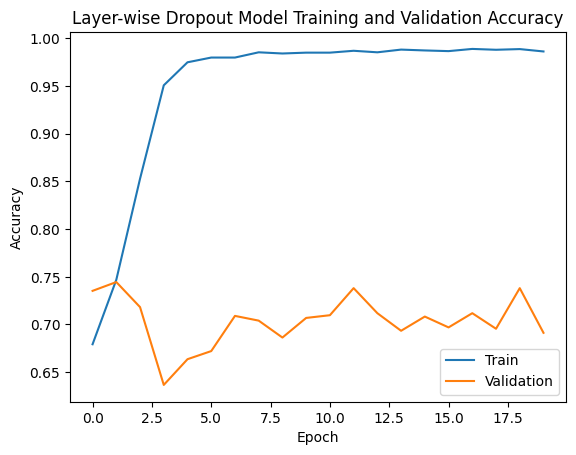

In [81]:
plot_training_curves(layerwise_dropout_history, 'Layer-wise Dropout Model Training and Validation Accuracy')

In [86]:
print("Layer-wise Dropout Model Evaluation:")
print("Accuracy:", layerwise_dropout_evaluation[0])
print("F1 Score:", layerwise_dropout_evaluation[1])
print("ROC AUC:", layerwise_dropout_evaluation[2])

Layer-wise Dropout Model Evaluation:
Accuracy: 0.6912704045422285
F1 Score: 0.5813282001924928
ROC AUC: 0.7921048681772542


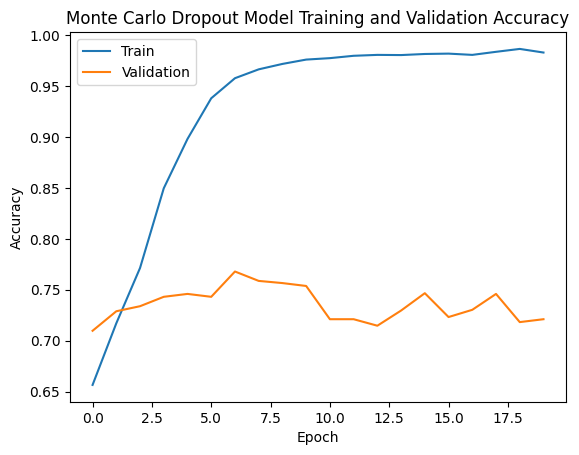

In [83]:
plot_training_curves(monte_carlo_dropout_history, 'Monte Carlo Dropout Model Training and Validation Accuracy')

In [87]:
print("Monte Carlo Dropout Model Evaluation:")
print("Accuracy:", monte_carlo_dropout_evaluation[0])
print("F1 Score:", monte_carlo_dropout_evaluation[1])
print("ROC AUC:", monte_carlo_dropout_evaluation[2])

Monte Carlo Dropout Model Evaluation:
Accuracy: 0.7317246273953159
F1 Score: 0.6070686070686072
ROC AUC: 0.7694007680602856


In [88]:
accuracy_values = [baseline_evaluation[0], dropout_evaluation[0], layerwise_dropout_evaluation[0], monte_carlo_dropout_evaluation[0]]
f1_values = [baseline_evaluation[1], dropout_evaluation[1], layerwise_dropout_evaluation[1], monte_carlo_dropout_evaluation[1]]
roc_auc_values = [baseline_evaluation[2], dropout_evaluation[2], layerwise_dropout_evaluation[2], monte_carlo_dropout_evaluation[2]]

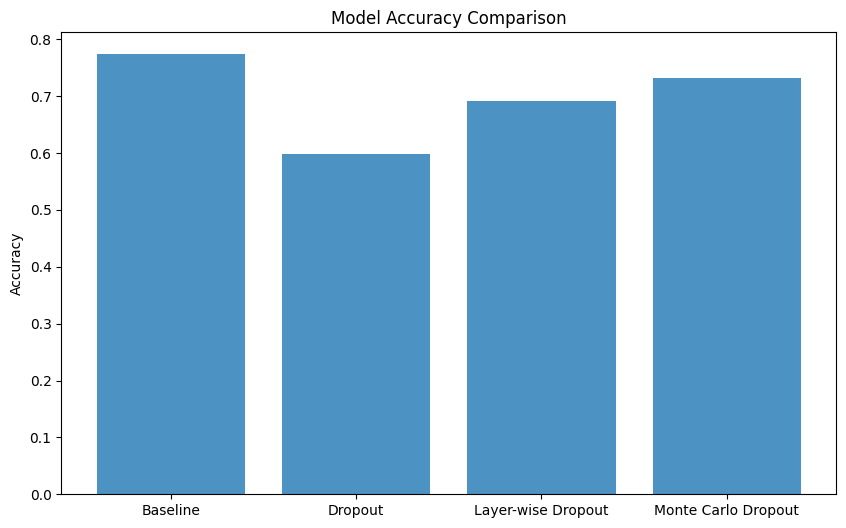

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(accuracy_values)), accuracy_values, align='center', alpha=0.8)
plt.xticks(range(len(accuracy_values)), ['Baseline', 'Dropout', 'Layer-wise Dropout', 'Monte Carlo Dropout'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

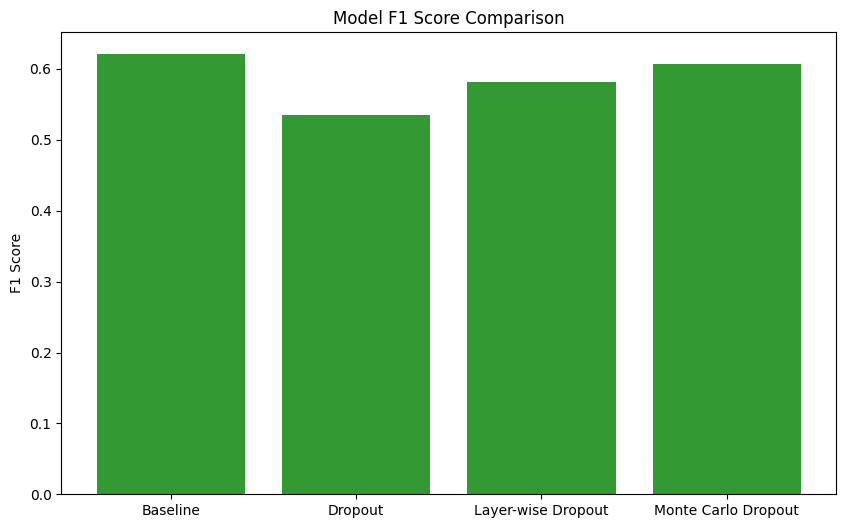

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(f1_values)), f1_values, align='center', alpha=0.8, color='green')
plt.xticks(range(len(f1_values)), ['Baseline', 'Dropout', 'Layer-wise Dropout', 'Monte Carlo Dropout'])
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.show()

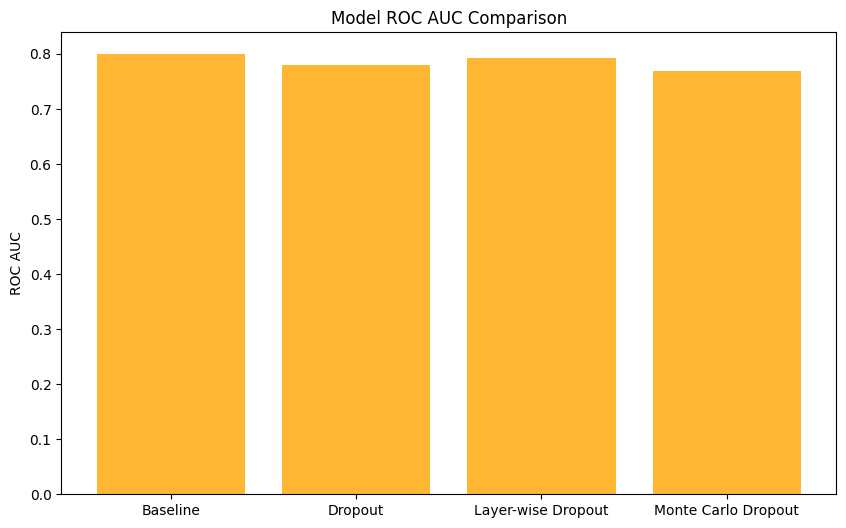

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(roc_auc_values)), roc_auc_values, align='center', alpha=0.8, color='orange')
plt.xticks(range(len(roc_auc_values)), ['Baseline', 'Dropout', 'Layer-wise Dropout', 'Monte Carlo Dropout'])
plt.ylabel('ROC AUC')
plt.title('Model ROC AUC Comparison')
plt.show()